In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("forest_cover_dataset.csv")
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,elevation,aspect,slope,h_dist_hydrology,v_dist_hydrology,h_dist_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,wilderness_area,soil_type,cover_type,cover_name
0,4357,359,1,801,53,2527,131,219,152,Cache la Poudre,Soil_37,2,Lodgepole Pine
1,2796,103,51,883,157,3575,106,195,70,Comanche Peak,Soil_25,5,Aspen
2,3432,22,36,259,163,1342,118,209,71,Cache la Poudre,Soil_29,2,Lodgepole Pine
3,3950,279,11,608,125,4007,139,155,129,Rawah,Soil_22,6,Douglas-fir
4,3840,191,1,338,70,4036,118,148,112,Cache la Poudre,Soil_14,1,Spruce/Fir


In [12]:
print("\n📊 Dataset Info:")
print(df.info())

print("\n🔍 Check for missing values:")
print(df.isnull().sum())

print("\n🎯 Unique cover types (Target Classes):")
print(df["cover_type"].value_counts())



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   elevation         1000 non-null   int64 
 1   aspect            1000 non-null   int64 
 2   slope             1000 non-null   int64 
 3   h_dist_hydrology  1000 non-null   int64 
 4   v_dist_hydrology  1000 non-null   int64 
 5   h_dist_roadways   1000 non-null   int64 
 6   hillshade_9am     1000 non-null   int64 
 7   hillshade_noon    1000 non-null   int64 
 8   hillshade_3pm     1000 non-null   int64 
 9   wilderness_area   1000 non-null   object
 10  soil_type         1000 non-null   object
 11  cover_type        1000 non-null   int64 
 12  cover_name        1000 non-null   object
dtypes: int64(10), object(3)
memory usage: 101.7+ KB
None

🔍 Check for missing values:
elevation           0
aspect              0
slope               0
h_dist_hydrology    0
v_dist_hydro

In [13]:
# Features and Target
X = df.drop("cover_type", axis=1)
y = df["cover_type"]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data split complete.")


✅ Data split complete.


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
print("🌲 Decision Tree Model trained.")


🌲 Decision Tree Model trained.


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



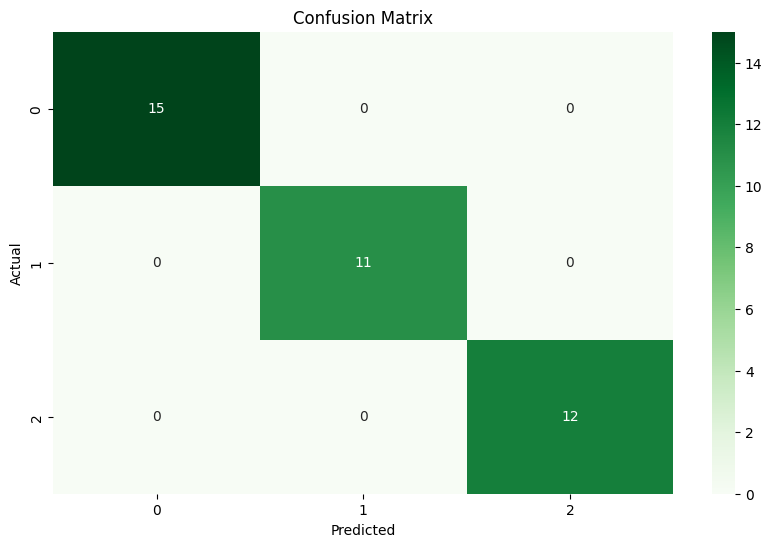

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
print("Features used for training:", X_train.shape[1])


Features used for training: 4


In [34]:
# Example input (Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology)
sample_input = np.array([[3000, 45, 10, 100]])


In [35]:
# Scale the input using the same scaler used in training
sample_scaled = scaler.transform(sample_input)

# Predict the class
predicted_class = model.predict(sample_scaled)

print("📌 Predicted Cover Type for new sample:", predicted_class[0])


📌 Predicted Cover Type for new sample: 2


In [36]:
import joblib
joblib.dump(model, "forest_cover_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and scaler saved.")


✅ Model and scaler saved.
